In [2]:
from gamefitter import *
import pandas as pd
import pickle

In [3]:
population = pickle.load(open('./data/optimization/population_random_2.829.pickle','rb'))
population.sort(key=lambda x: x['error'])
len(population)

818

In [16]:
for p in population:
    print(p['error'], len(p['topology']))

2.8293900728446535 170
2.847718739884286 110
2.8749179390952175 111
2.8759495185014576 322
2.889946829956324 213
2.8991048856844377 299
2.9213184315996408 344
2.9237423193243615 177
2.924101522186018 179
2.9264617362441627 308
2.934758957978403 294
2.935899577575785 300
2.9421502953439 260
2.9422193302809725 254
2.9422650373267714 282
2.942724613585864 191
2.9448006629026495 335
2.944914507129081 331
2.945665789656821 351
2.946383711534403 254
2.947073091132182 317
2.9474080728575696 246
2.94816518768511 235
2.948179947977857 319
2.949163821847229 316
2.9499840248106444 348
2.950061992510157 253
2.9508966706389606 305
2.9531814375915615 153
2.953936688817881 326
2.9542136706368076 114
2.9543014615099352 349
2.954663516735149 252
2.954732518215425 232
2.9563744461920733 179
2.9575069371924574 293
2.958298871456786 260
2.958756785345079 88
2.9598257594897994 309
2.9602285711619154 269
2.96136317223551 127
2.9620008064489216 204
2.962182142789329 288
2.962437606574772 288
2.96344644899682

In [ ]:
population.sort(key=lambda x: len(x['topology']))

Text(0, 0.5, 'error (RMSE)')

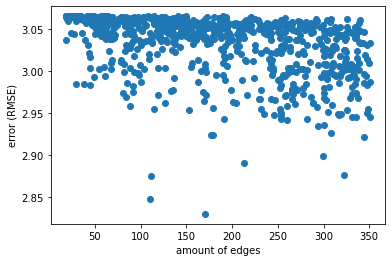

In [22]:
import matplotlib.pyplot as plt
plt.scatter([len(p['topology']) for p in population],[p['error'] for p in population])
plt.xlabel('amount of edges')
plt.ylabel('error (RMSE)')

In [4]:
#optimize
import scipy
from genetic import *
p = population[0]
def eval_fun(alpha, hypothesis):
    hypothesis['alpha'] = alpha
    return evaluate(hypothesis)

x0=[0.5]
bnds = [(0.0, 1.0)]
r = scipy.optimize.minimize(eval_fun, x0, args=p, bounds=bnds, tol=0.001)
print(f"{r['x'][0]} => {r['fun']}")

0.0 => 11.056420959987207


In [46]:
for i, p in enumerate(population):
    print(i, p['error'], sum(p['starting_state']), len(p['topology']), p['alpha'])

0 9.291971843518509 [14929 10819] 21 0.09349882049420569
1 9.35632089770016 [16061 11510] 21 0.09972937135728208
2 9.372931870650286 [17116 12194] 21 0.11117904289367801
3 9.37925212212415 [15861 12256] 21 0.10268800558917185
4 9.406065812765402 [15900 12117] 21 0.10795346414956727
5 9.418657606639659 [16058 11692] 21 0.11200429194849502
6 9.434766282999004 [15437 11437] 21 0.10169559138498238
7 9.445751543536502 [15745 12487] 21 0.10390263635063951
8 9.456724043220762 [16228 12620] 21 0.09634673795091801
9 9.462988330762547 [16032 12156] 21 0.1209496336835594
10 9.46611891999078 [16133 12606] 21 0.13247690483141555
11 9.470030701190018 [16886 12852] 21 0.10349486277903422
12 9.473549923241453 [15659 11893] 21 0.10446407806824809
13 9.47511360236793 [15450 11815] 21 0.08941216517995726
14 9.491126460093211 [15152 12826] 21 0.10719259503095861
15 9.502046563182528 [11834  6722] 22 0.03514907202813729
16 9.516846661072687 [15606 12284] 21 0.1091987847792141
17 9.519181415164585 [15632 12

In [53]:
population[0]

{'starting_state': [array([1092,  315]),
  array([236,   2]),
  array([3611,  614]),
  array([1794,   87]),
  array([2673, 1285]),
  array([1219,  336]),
  array([ 132, 2327]),
  array([ 46, 567]),
  array([  2, 551]),
  array([16,  3]),
  array([1147,  666]),
  array([ 75, 595]),
  array([ 39, 326]),
  array([ 4, 25]),
  array([ 41, 168]),
  array([355, 345]),
  array([58,  2]),
  array([436,  52]),
  array([577, 885]),
  array([108, 321]),
  array([3, 2]),
  array([465,  10]),
  array([ 63, 166]),
  array([ 8, 26]),
  array([208, 157]),
  array([410, 738]),
  array([111, 248])],
 'strategies': [array([[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
          1, 1, 1, 0, 0]]),
  array([[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
          0, 0, 1, 1, 0]]),
  array([[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
          0, 1, 1, 1, 1]]),
  array([[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
          

In [48]:
p = population[0]
pd.DataFrame(p['starting_state'], index=country_names)

NameError: name 'country_names' is not defined

In [50]:
[a[0] for a in p['strategies']]

[array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]),
 array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]),
 array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]),
 array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]),
 array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])]

In [51]:
pd.DataFrame(np.array([a[0] for a in p['strategies']]).transpose(), index=country_names, columns=list(range(2009,2019)))

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Netherlands,1,0,1,0,0,1,0,0,1,1
Germany,1,1,1,1,1,1,0,0,0,0
Luxembourg,0,1,1,1,1,1,1,0,1,1
Italy,1,0,1,0,1,1,0,1,1,0
Sweden,0,1,1,1,1,1,1,0,0,0
Austria,1,0,1,0,1,1,0,0,0,0
United Kingdom,1,0,0,0,0,0,1,0,0,1
Finland,1,0,0,1,1,0,1,0,1,0
France,1,1,0,0,1,0,0,0,0,0
Spain,0,0,1,0,1,1,0,0,1,0


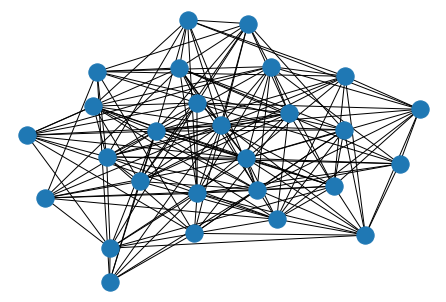

In [15]:
# look at the game graph
hypothesis = population[0]
game_settings = {
            "start_populations_matrix": hypothesis['starting_state'],
            "topology": hypothesis['topology'],
            'alpha': hypothesis['alpha'],
            'log_level': "warning",
            'player_labels':hypothesis['player_labels']
        }
game = PolymatrixGame(**game_settings)
import networkx as nx
G = game.network
nx.draw(G)

In [ ]:
# compute gameplay to understand node sizes

In [27]:
node_sizes = [sum(i)/100 for i in population[0]['starting_state']]
node_sizes

[2528.63,
 39.96,
 576.29,
 1739.86,
 1866.6,
 1804.05,
 369.36,
 355.02,
 183.81,
 38.15,
 307.81,
 184.2,
 185.65,
 69.47,
 230.21,
 449.3,
 95.93,
 920.14,
 1438.94,
 160.86,
 20.0,
 522.94,
 156.85,
 115.0,
 287.29,
 296.36,
 480.0]

In [28]:
len(node_sizes)

27

27


<IPython.core.display.Javascript object>


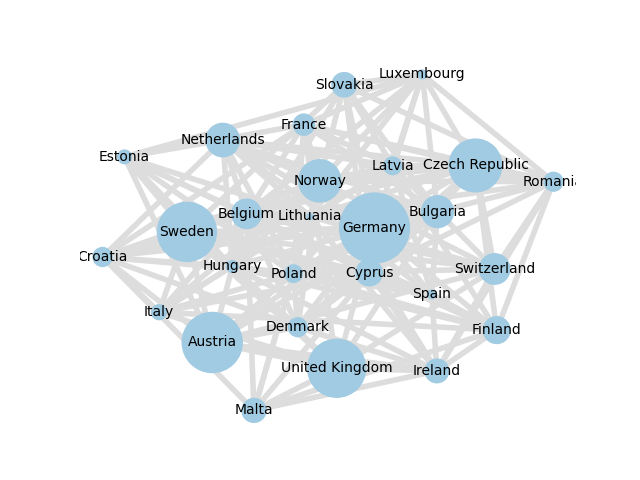

C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


In [29]:
country_names = population[0]['player_labels']

def visualize_kg(G):
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    # TODO: add edge labels
    %matplotlib nbagg
    import matplotlib.pyplot as plt

    import networkx as nx
    
    def remove_duplicates(x):
        return list(dict.fromkeys(x))

    edges = remove_duplicates(list(G.edges()))
    m = len(edges)
    nodes = list(G.nodes())
    n = len(nodes)
    print(len(nodes))
    pos=nx.spring_layout(G) # positions for all nodes
    
    # some math labels
    labels={}
    for node in nodes:
        labels[node] = str(country_names[node])
    
    colors=['#DDDDDD']*m
    nx.draw_networkx_labels(G,pos,labels,font_size=10)
    nx.draw(G, pos, node_size = node_sizes[0:n], node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=plt.cm.Blues, with_labels=False)

    plt.axis('off')
    plt.savefig("labels_and_colors.png") # save as png
    plt.show() # display
visualize_kg(G)

In [67]:
new_pops = []
for p in population:
    for i, arr in enumerate(p['starting_state']):
        for j, elem in enumerate(arr):
            if elem<0:
                p['starting_state'][i][j]=0
    p['error']=None
    new_pops.append(p)
print(len(new_pops))
pickle.dump(new_pops, open('./data/optimization/population_edge_3_11.xx.pickle','wb'))

70


## Crossing over

In [220]:
p1 = population[7]
p1

{'starting_state': [array([ 9, 47]),
  array([12, 34]),
  array([13, 18]),
  array([63,  2]),
  array([ 9, 48]),
  array([ 8, 38]),
  array([67,  2]),
  array([35, 28]),
  array([45, 48]),
  array([56,  9]),
  array([25, 12]),
  array([45, 60]),
  array([50, 20]),
  array([39, 64]),
  array([32, 42]),
  array([18, 18]),
  array([59,  0]),
  array([70, 12])],
 'strategies': [array([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]]),
  array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]]),
  array([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
  array([[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]]),
  array([[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]]),
  array([[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]]),
  array([[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]),
  array([[1, 0, 1, 0, 

In [211]:
p2 = population[10]

In [228]:
p2['strategies'][1][0][1]

1

In [3]:
from corpgame import PolymatrixGame
import numpy as np
import pickle

def in_list(candidate, full_list):
    for element in full_list:
        if candidate==element:
            return True
    return False


game_settings = {
        "start_populations_matrix": [[5, 10], [5, 5], [15, 5], [15, 5], [30, 5],[3,17]],
        "topology": "chain",
        'alpha': 0.7,
        'log_level': "warning"
    }
game = PolymatrixGame(**game_settings)
self = game.network
print(game.network.graph.edges)

keep_looking = True
n = len(self.graph.nodes)
m = len(self.graph.edges)
if m<n*(n-1)/2:
    edges = list(self.graph.edges)
    nodes = list(range(0,n))
    possible_edges = [
                    [nodes[i], nodes[j]]
                    for i in range(len(nodes))
                    for j in range(i + 1, len(nodes))
                ]
    temp_graph = self.graph.copy()
    while keep_looking and len(possible_edges)!=0: # try to remove edges but only if it doesn't disconnect the graph
        edge_candidate = tuple(possible_edges.pop(np.random.randint(0,len(possible_edges))))
        #print(edge_candidate, edges, in_list(edge_candidate, edges))
        if not in_list(edge_candidate, edges):
            temp_graph.add_edge(*edge_candidate)
            self.graph = temp_graph.copy()
            keep_looking=False
print(self.graph.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
[(0, 1), (1, 2), (1, 5), (2, 3), (3, 4), (4, 5)]


In [39]:
print(game.network.graph.edges)

keep_looking = True
n = len(self.graph.nodes)
m = len(self.graph.edges)
if m<n*(n-1)/2:
    edges = list(self.graph.edges)
    nodes = list(range(0,n))
    possible_edges = [
                    [nodes[i], nodes[j]]
                    for i in range(len(nodes))
                    for j in range(i + 1, len(nodes))
                ]
    temp_graph = self.graph.copy()
    while keep_looking and len(possible_edges)!=0: # try to remove edges but only if it doesn't disconnect the graph
        edge_candidate = tuple(possible_edges.pop(np.random.randint(0,len(possible_edges))))
        #print(edge_candidate, edges, in_list(edge_candidate, edges))
        if not in_list(edge_candidate, edges):
            temp_graph.add_edge(*edge_candidate)
            self.graph = temp_graph.copy()
            keep_looking=False
print(self.graph.edges)

[(0, 1), (0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (1, 3), (1, 4), (2, 3), (2, 5), (2, 4), (3, 4), (3, 5), (4, 5)]
[(0, 1), (0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (1, 3), (1, 4), (2, 3), (2, 5), (2, 4), (3, 4), (3, 5), (4, 5)]


In [41]:
n = 18
nodes = list(range(n))

edges = [
            [nodes[i], nodes[j]]
            for i in range(len(nodes))
            for j in range(i + 1, len(nodes))
        ]

edges = list(np.random.permutation(list(edges)))
edges

[array([3, 7]),
 array([ 8, 14]),
 array([7, 8]),
 array([ 3, 12]),
 array([11, 17]),
 array([ 9, 14]),
 array([0, 1]),
 array([ 7, 10]),
 array([10, 14]),
 array([12, 15]),
 array([ 3, 10]),
 array([ 2, 14]),
 array([ 1, 11]),
 array([1, 5]),
 array([ 0, 10]),
 array([10, 13]),
 array([ 5, 16]),
 array([5, 6]),
 array([1, 9]),
 array([5, 8]),
 array([5, 9]),
 array([12, 16]),
 array([1, 2]),
 array([4, 9]),
 array([11, 15]),
 array([10, 12]),
 array([4, 7]),
 array([2, 9]),
 array([ 9, 16]),
 array([2, 8]),
 array([2, 4]),
 array([3, 9]),
 array([ 7, 14]),
 array([8, 9]),
 array([ 2, 17]),
 array([0, 5]),
 array([1, 4]),
 array([ 1, 16]),
 array([ 4, 11]),
 array([ 0, 11]),
 array([0, 3]),
 array([ 6, 15]),
 array([ 1, 13]),
 array([ 2, 12]),
 array([ 0, 13]),
 array([1, 8]),
 array([ 6, 10]),
 array([15, 16]),
 array([4, 6]),
 array([3, 6]),
 array([7, 9]),
 array([1, 6]),
 array([0, 2]),
 array([ 2, 16]),
 array([ 1, 17]),
 array([0, 9]),
 array([2, 7]),
 array([ 2, 11]),
 array([6,

In [ ]:
if np.random.randint==
if len(game.network.graph.edges)>(len(game.players)-1):
    game.network.remove_random_edge()
    hypothesis['topology'] = list(game.network.graph.edges)
return hypothesis